## Run diagnostic plots/statistics (e.g. HMF, richness) for halo-matched cluster. 
Useful for comparing matching algos. 

In [3]:
import numpy as np

# import pyplot and set some parameters to make plots prettier
import matplotlib.pyplot as plt
from tools.plot_utils import plot_pretty
plot_pretty()
%matplotlib inline

import sys
sys.path.append('/home/zzbenjamin94/Desktop/Astronomy/Research/DES_Galaxy_Cluster')
from mpl_toolkits.mplot3d import Axes3D
from tools.setup.setup import tools_home_dir, home_dir, bigdata_home_dir
import astropy.io.fits as fits
toolsdir = tools_home_dir()
homedir = home_dir()
bigdatadir = bigdata_home_dir()

import astropy.io.fits as pyfits
import ConfigParser
import healpy as hp
import treecorr
import os

## Import catalogs

### Halo matched clusters in v.16 ZZhang+19

In [11]:
#Miscentering cut
import pickle

redM_halos = homedir + 'output/buzzard/redM_halos_noshape_v1.4_redMv1.6.data'

infile = open(redM_halos,'rb')
redM_halos = pickle.load(infile)
infile.close()

redM_halos_ZZhang = redM_halos.view(np.recarray)
print redM_halos.dtype
print len(redM_halos)

(numpy.record, [('RA', '>f8'), ('TRA', '>f8'), ('DEC', '>f8'), ('TDEC', '>f8'), ('Z', '>f8'), ('HALOID', '>i8'), ('DESCID', '>i8'), ('MVIR', '>f8'), ('VMAX', '>f8'), ('VRMS', '>f8'), ('RVIR', '>f8'), ('RS', '>f8'), ('NP', '>f8'), ('PX', '>f8'), ('PY', '>f8'), ('PZ', '>f8'), ('VX', '>f8'), ('VY', '>f8'), ('VZ', '>f8'), ('JX', '>f8'), ('JY', '>f8'), ('JZ', '>f8'), ('SPIN', '>f8'), ('RS_KLYPIN', '>f8'), ('MVIR_ALL', '>f8'), ('M200B', '>f8'), ('M200C', '>f8'), ('M500C', '>f8'), ('M2500C', '>f8'), ('XOFF', '>f8'), ('VOFF', '>f8'), ('SPIN_BULLOCK', '>f8'), ('B_TO_A', '>f8'), ('C_TO_A', '>f8'), ('PID', '>i8'), ('LUMTOT', '>f8'), ('LUM20', '>f8'), ('LBCG', '>f8'), ('NGALS', '>i8'), ('N18', '>i8'), ('N19', '>i8'), ('N20', '>i8'), ('N21', '>i8'), ('N22', '>i8'), ('matching_ID', '<i8'), ('MEM_MATCH_ID', '<i8'), ('LAMBDA_CHISQ', '<f8'), ('RA_REDM', '<f8'), ('DEC_REDM', '<f8'), ('centered_flag', '<i8'), ('ID_CENT', '<i8'), ('BCG_ID', '<i8')])
23658


### Farahi16_Chinchilla_v1.9.9 matched clusters

In [4]:
import pandas as pd
filename = homedir+'output/buzzard/'+'matched_cluster_Farahi16_Chinchilla_v1.9.9.csv'
matchedcl_membership = pd.read_csv(homedir+'output/buzzard/'+'matched_cluster_Farahi16_Chinchilla_v1.9.9.csv')

#Convert to record array
matchedcl_membership= matchedcl_membership.to_records()
print matchedcl_membership.dtype
print np.shape(matchedcl_membership)
print matchedcl_membership['Strength']

(numpy.record, [('index', '<i8'), ('HALOID', '<i8'), ('PMEM', '<f8'), ('Strength', '<f8'), ('MEM_MATCH_ID', '<i8'), ('Rank', '<i8')])
(57460,)
[8.48976910e-01 2.08422113e-02 1.91132575e-02 ... 1.34766591e-03
 6.36687619e-04 5.28566190e-04]


### redM cluster v1.9.9

In [5]:
#Import the redMaPPer galaxy catalog
homedir = home_dir()
redM_dir = bigdatadir + '/Buzzard_Sims/v1.9.9/redMaPPer/'+'buzzard_1.9.9_3y3a_rsshift_run_redmapper_v0.5.1_lgt20_vl02_catalog.fit'

redM_list = fits.open(redM_dir)
redM_data = redM_list[1].data
redM_data = redM_data.view(np.recarray)

print "Names of redM_matched halo column data are:"
print redM_data.dtype.names, "\n"
print "Number of redM read is ", len(redM_data)

Names of redM_matched halo column data are:
('mem_match_id', 'ra', 'dec', 'z', 'refmag', 'refmag_err', 'lambda', 'lambda_e', 'z_lambda', 'z_lambda_e', 'cg_spec_z', 'z_spec_init', 'z_init', 'r_lambda', 'r_mask', 'scaleval', 'maskfrac', 'zred', 'zred_e', 'zred_chisq', 'chisq', 'z_lambda_niter', 'ebv_mean', 'lnlamlike', 'lncglike', 'lnlike', 'ra_orig', 'dec_orig', 'w', 'dlambda_dz', 'dlambda_dz2', 'dlambdavar_dz', 'dlambdavar_dz2', 'z_lambda_raw', 'z_lambda_e_raw', 'lim_exptime', 'lim_limmag', 'lim_limmag_hard', 'lambda_c', 'lambda_ce', 'ncent_good', 'maskgal_index', 'mag', 'mag_err', 'pzbins', 'pz', 'ra_cent', 'dec_cent', 'id_cent', 'lambda_cent', 'zlambda_cent', 'p_cen', 'q_cen', 'p_fg', 'q_miss', 'p_sat', 'p_c') 

Number of redM read is  2849


### Halos

In [7]:
#Import the redMaPPer galaxy catalog
homedir = home_dir()
halos_dir = bigdatadir + '/Buzzard_Sims/v1.9.9/halos/'+'Chinchilla-3_v1.9.9_halos_all.fit'

halos_list = fits.open(halos_dir)
halos_data = halos_list[1].data
halos_data = halos_data.view(np.recarray)

print "Names of halo column data are:"
print halos_data.dtype.names, "\n"
print "Number of halos read is ", len(halos_data)

Names of halo column data are:
('ID', 'DESCID', 'MVIR', 'VMAX', 'VRMS', 'RVIR', 'RS', 'NP', 'PX', 'PY', 'PZ', 'VX', 'VY', 'VZ', 'JX', 'JY', 'JZ', 'SPIN', 'RS_KLYPIN', 'MVIR_ALL', 'M200B', 'M200C', 'M500C', 'M2500C', 'XOFF', 'VOFF', 'SPIN_BULLOCK', 'B_TO_A', 'C_TO_A', 'PID', 'LUMTOT', 'LUM20', 'LBCG', 'NGALS', 'N18', 'N19', 'N20', 'N21', 'N22', 'Z', 'RA', 'DEC') 

Number of halos read is  14946507


## Match best halo to cluster

In [8]:
#Find unique MEM_MATCH_IDs
uniq_cl_id = np.unique(matchedcl_membership['MEM_MATCH_ID'])
cl_ids = matchedcl_membership['MEM_MATCH_ID']
print uniq_cl_id, len(uniq_cl_id)

matched_ind = []
for i, cur_cl_id in enumerate(uniq_cl_id):
    
    cur_ids_ind = np.where(cl_ids == cur_cl_id)
    cur_cl = matchedcl_membership[cur_ids_ind]
    
    dummy_ind = np.argmax(cur_cl['Strength']) ## Find halo with highest strength
    cur_matched_ind = cur_cl[dummy_ind]['index'] ##Obtain index in the full array
    matched_ind.append(cur_matched_ind)
    
print len(matched_ind)
matchedcl_membership = matchedcl_membership[matched_ind] #Filter out the lower strength halos

[     1      2      3 ...  43100  86587 273420] 2849
2849


In [9]:
print "After filtering number of matched clusters is ", len(matchedcl_membership)

#Filter out non-unique halos
unique_ID, unique_ind = np.unique(np.unique(matchedcl_membership['HALOID']), return_index=True)
matchedcl_membership = matchedcl_membership[unique_ind]
print "Number of unique halo matches is ", len(matchedcl_membership)

After filtering number of matched clusters is  2849
Number of unique halo matches is  2848


In [10]:
## Match redM_data and halos_data onto unique
intersect1d, comm1, comm2 = np.intersect1d(matchedcl_membership['HALOID'], halos_data['ID'], \
      assume_unique=True, return_indices=True)
matchedcl_membership = matchedcl_membership[comm1]
halos_data = halos_data[comm2]
print len(matchedcl_membership), len(halos_data)

intersect1d, comm1, comm2 = np.intersect1d(matchedcl_membership['MEM_MATCH_ID'], redM_data['mem_match_id'], \
      assume_unique=True, return_indices=True)
matchedcl_membership = matchedcl_membership[comm1]
redM_data = redM_data[comm2]
print len(matchedcl_membership), len(redM_data)

373 373
373 373


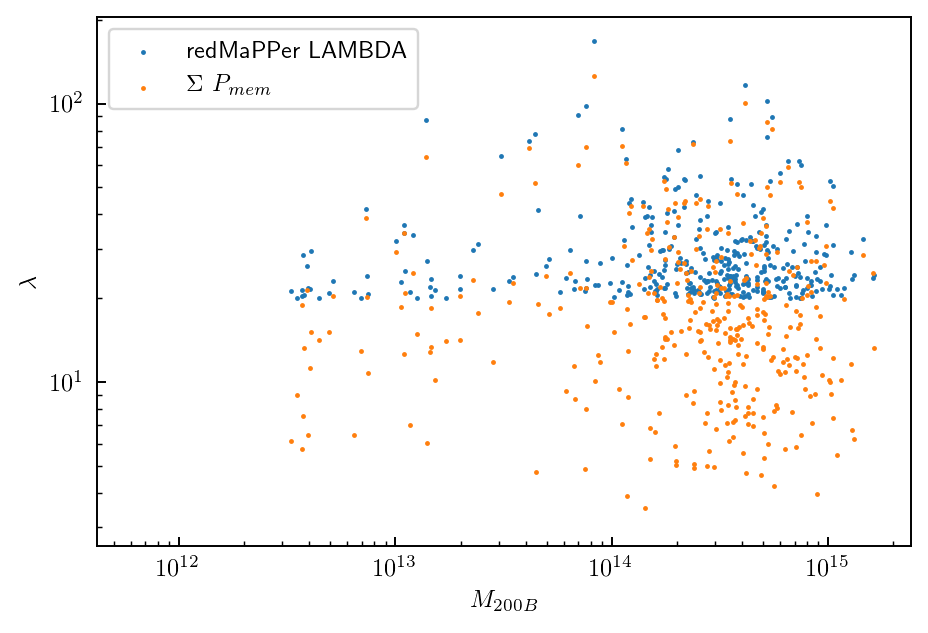

In [12]:
plt.scatter(halos_data['M200B'],redM_data['lambda'], s=1, label='redMaPPer LAMBDA')
plt.scatter(halos_data['M200B'],matchedcl_membership['PMEM'], s=1, label=r'$\Sigma~P_{mem}$')
plt.xscale('log'); plt.yscale('log')
plt.ylabel(r'$\lambda$'); plt.xlabel(r'$M_{200B}$')
plt.legend()
plt.show()

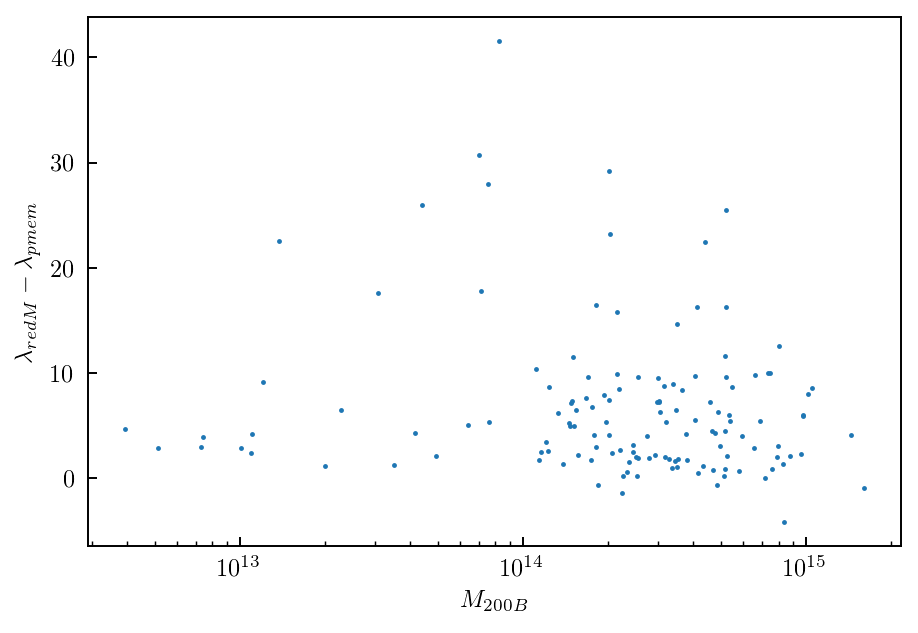

In [13]:
#Apply richness cut of 20 to pmem
dummy_ind = np.where(matchedcl_membership['PMEM'] > 20)
diff_lambda = redM_data['lambda'] - matchedcl_membership['PMEM']
diff_lambda_20cut = diff_lambda[dummy_ind]
m200b_20cut = halos_data['M200B'][dummy_ind]
plt.scatter(m200b_20cut, diff_lambda_20cut, s=1)
plt.xscale('log'); 
plt.ylabel(r'$\lambda_{redM} - \lambda_{pmem}$'); plt.xlabel(r'$M_{200B}$')
plt.show()



## Plot richness, mass, and redshift distribution of matched clusters.
### c.f. v1.9.9. of Arya Farahi 16 matching with v1.6 of halo-cluster matching

(array([0.03687509, 0.18500045, 0.35312585, 0.91687721, 1.73000418,
        2.6931315 , 3.4806334 , 3.86000932, 1.46875355, 0.06187515]),
 array([0.08983899, 0.15746923, 0.22509946, 0.2927297 , 0.36035994,
        0.42799017, 0.49562041, 0.56325065, 0.63088088, 0.69851112,
        0.76614136]),
 <a list of 10 Patch objects>)

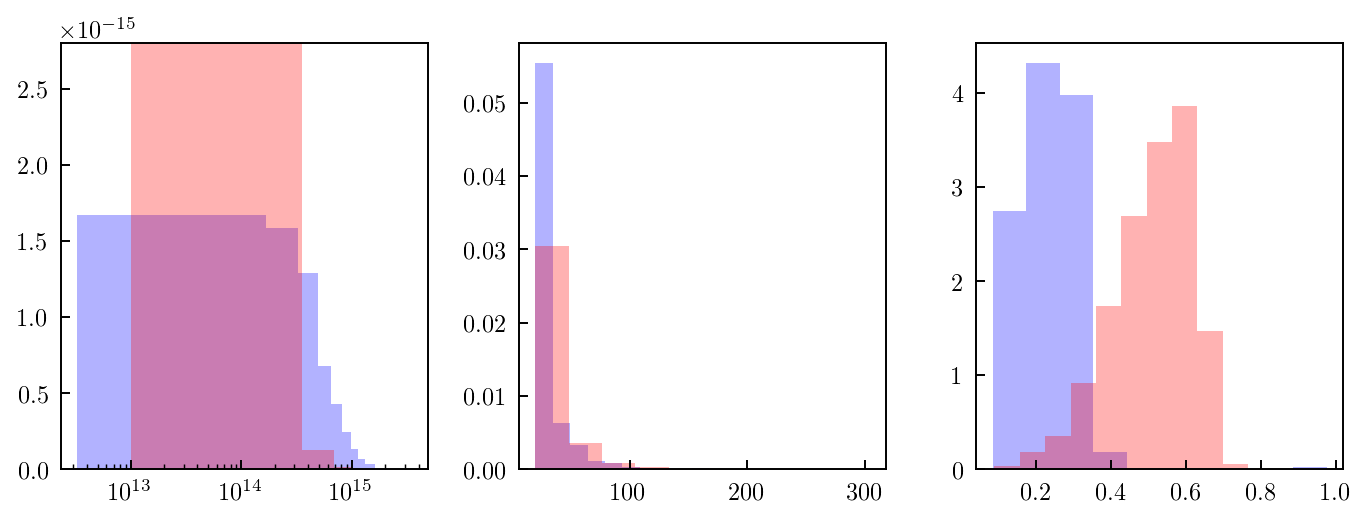

In [35]:
fig, ax = plt.subplots(1, 3, figsize=(8,3))
plt.tight_layout()

#Mass distribution
ax[0].hist(halos_data['M200B'], density=True, alpha=0.3, color='blue')
ax[0].hist(redM_halos_ZZhang.M200B, density=True, alpha=0.3, color='red')
ax[0].set_xscale('log')

#Mass distribution
ax[1].hist(redM_data['lambda'], density=True, alpha=0.3, color='blue')
ax[1].hist(redM_halos_ZZhang.LAMBDA_CHISQ, density=True, alpha=0.3, color='red')

#Mass distribution
ax[2].hist(halos_data['Z'], density=True, alpha=0.3, color='blue')
ax[2].hist(redM_halos_ZZhang.Z, density=True, alpha=0.3, color='red')